## 逻辑斯特回归解决多分类问题
手写数字识别

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize

In [132]:
aa = np.array([[[1],[2],[3]],[[1],[2],[3]]])
print(aa.shape)
a = np.insert(aa, 1, values=333, axis=2)
print(a)#第一维，第二维，第三维
print(a.shape)
a = np.insert(aa, 1, values=333, axis=0)
print(a)
print(a.shape)


(2, 3, 1)
[[[  1 333]
  [  2 333]
  [  3 333]]

 [[  1 333]
  [  2 333]
  [  3 333]]]
(2, 3, 2)
[[[  1]
  [  2]
  [  3]]

 [[333]
  [333]
  [333]]

 [[  1]
  [  2]
  [  3]]]
(3, 3, 1)


In [133]:
path = '/home/alex/test/NG_exercise/ex3_neuralNetwork/ex3data1.mat'
#mat是MATLAB的文件格式，用scipy.io导入
data = sio.loadmat(path)

In [134]:
print(data.keys())
print(data) #文件保存的是字典格式

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


In [135]:
raw_x = data['X']#训练集
raw_y = data['y']#期望

In [136]:
print(raw_x)
print(raw_y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [137]:
print(raw_x.shape, raw_y.shape)

(5000, 400) (5000, 1)


In [138]:
def plot_image(X):
    
    random_1 = np.random.randint(5000)

    image = X[random_1,:]
    
    fig,ax = plt.subplots(figsize=[1,1])
    ax.imshow(image.reshape(20,20).T, cmap='gray_r')
    
    plt.xticks([])
    plt.yticks([])

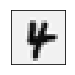

In [139]:
plot_image(raw_x) #看看样本图

In [140]:
def plot_100_image(X):
    sample_index = np.random.choice(len(X), 100)
    images = X[sample_index,:]
    print(images.shape)
    
    #10⾏，10列，图⽚⼤⼩，共享x，y轴的坐标轴具有相同属性
    fig, ax = plt.subplots(ncols=10, nrows=10, figsize=[8,8], sharex=True, sharey=True)
    
    for r in range(10):
        for c in range(10):
            #图片保存格式是数组形式，reshape为20*20
            #⽩底⿊字
            ax[r,c].imshow(images[10 * r + c].reshape(20,20).T, cmap='gray_r')
            
    plt.xticks([])#没有刻度
    plt.yticks([])
    
    plt.show()

(100, 400)


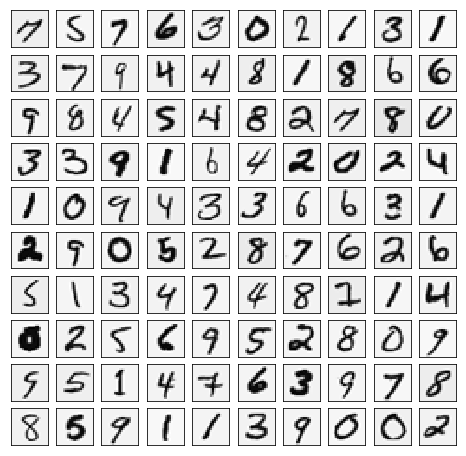

In [141]:
plot_100_image(raw_x)

In [142]:
def sigmoid(z):
    return np.exp(z) / (1 + np.exp(z))

In [143]:
def cost_function(theta, x, y, lamda):
    
    h_theta = sigmoid(x @ theta)
        
    left = y * np.log(h_theta)
    right =  (1 - y) * np.log(1 - h_theta)
    
    reg = theta[1:] @ theta[1:] * (lamda / (2 * len(x)))
    
    return  -np.sum(left + right) / len(x) + reg


In [144]:
#只定义正则化项部分的梯度下降函数
def gradient_reg(theta, x, y, lamda):
    reg = theta[1:] * (lamda / len(x))
    reg = np.insert(reg, 0, values=0, axis=0)
    
    first = (x.T @(sigmoid(x@theta) - y)) / len(x)
    
    return first + reg

In [145]:
X = np.insert(raw_x, 0, values=1, axis=1)#这里我不懂，为什么要插入一列全零
#原因是增加一维偏置量
# X = raw_x
print(X.shape)

(5000, 401)


In [146]:
#minimize用到的是一维数列
#flatten 多维数组降一维
y = raw_y.flatten()
# xx = raw_y.reshape(len(raw_y),)#和flatten效果看似⼀样
# print(xx.shape)
y.shape

(5000,)

In [249]:
def one_vs_all(x, y, lamda, k):
    
    n = x.shape[1]  #401
    theta_all = np.zeros((k,n))   #k*401
    
    for i in range(1, k+1): #样本中的y列的定义方式：10~9分别对应数字0~9，就是这么定义的
        theta_i = np.zeros(n,)
        #fun传入目标函数#x0传入初始值#args不懂
        #method传入最小化方法#jac传入梯度方向
        #y这里判别的是哪一类标签，有10~9,十个类别
        res = minimize(fun=cost_function,
                        x0=theta_i,
                        args=(x, y==i, lamda),
                        method='CG',
                        jac=gradient_reg)
        #逻辑斯特回归解决二分类问题时候是“手动”将迭代的theta传入到cost_function中去
        
        print("res", res)
#         print("")
#         print("y", y.shape)
#         print("i", i)
        #每次迭代后都传回一个res.x就是theta
        theta_all[i-1,:]=res.x 
    return theta_all

In [250]:
lamda = 1
k = 10#识别数字0~9，十个类别，所以这里k赋值10

In [251]:
theta_final =one_vs_all(X, y, lamda, k)

res      fun: 0.02696039886417112
     jac: array([-8.74118774e-06,  0.00000000e+00,  0.00000000e+00, -1.61970370e-10,
        1.50365595e-09,  1.60755557e-09,  1.67554249e-10, -1.54966603e-08,
       -1.47242341e-08, -6.54122218e-10,  3.91479385e-09,  1.04638294e-09,
       -8.81698949e-10, -4.18742484e-09,  1.68652186e-10,  8.30795619e-09,
        7.98989819e-09,  6.60686671e-10, -1.07346886e-10, -6.28070678e-13,
        0.00000000e+00, -1.75678679e-13,  1.22581101e-11,  1.82077463e-09,
       -1.80305445e-08, -1.92927935e-08,  1.09521637e-08, -3.20619396e-08,
       -7.50598437e-08, -6.14196608e-08, -6.07402537e-08, -9.50314720e-09,
        1.17433300e-08,  4.81428550e-08,  6.97079776e-10, -9.04601722e-08,
       -8.27100052e-08, -7.43395479e-09, -8.29972085e-09,  1.08387283e-09,
        5.14341969e-10,  1.49345474e-12,  1.41126971e-10,  2.09273219e-09,
       -3.27536303e-08, -8.39847755e-08, -2.84490348e-07, -3.26420417e-07,
       -2.47514308e-07, -1.86438252e-07, -1.17699867e-07

res      fun: 0.06844355041110652
     jac: array([ 3.97136547e-06,  0.00000000e+00,  0.00000000e+00,  2.10850170e-10,
       -2.71228263e-09,  4.53159857e-09,  9.31568178e-08,  1.20966666e-07,
        1.23925831e-07,  1.26003126e-08,  1.62568501e-07,  5.71509352e-08,
       -2.11811177e-08, -6.26259515e-09,  1.46411776e-08,  1.27906318e-07,
        2.76389192e-08, -4.28056855e-08,  2.48300347e-09,  1.38666217e-10,
        0.00000000e+00,  8.53394927e-12,  4.25648402e-10, -7.70719072e-09,
        2.22239667e-08, -1.07786410e-07, -1.00600475e-06, -3.32355787e-07,
       -1.67399982e-07,  2.87698279e-07,  6.22908093e-07,  5.11349806e-07,
        2.08841006e-07, -1.13377345e-08, -9.01177445e-08, -1.25674860e-06,
       -2.74549462e-07,  5.82305827e-07,  1.25337243e-08, -2.34337834e-09,
        8.78315670e-10,  5.12402104e-11, -6.04503948e-09, -2.45535505e-08,
        3.60193231e-07,  2.25844389e-06,  1.66492939e-06,  7.74270405e-07,
        2.71738566e-06,  5.36187937e-06,  9.46615967e-07

res      fun: 0.07170668420678906
     jac: array([-4.97442116e-06,  0.00000000e+00,  0.00000000e+00,  4.34264740e-11,
        2.13644803e-09, -4.59009632e-08, -1.55294020e-07,  2.96095553e-07,
       -1.85096536e-08, -9.11400743e-08, -6.62843425e-08, -2.51215734e-08,
        6.05738281e-08,  1.66701778e-07, -1.44361463e-07, -2.05986861e-07,
        2.54980261e-08,  3.58565707e-10,  4.95041998e-11, -1.04203674e-11,
        0.00000000e+00, -1.21360330e-12,  4.20456402e-11, -5.67799096e-10,
       -6.45450081e-09,  3.98746890e-08,  1.20510727e-06,  2.51526733e-06,
        1.82481078e-06,  7.43357718e-07, -5.04378095e-07, -2.33016519e-07,
       -7.07961738e-07, -1.86354584e-06,  1.62088606e-06,  2.26690696e-06,
       -2.24988910e-07,  9.50293939e-08,  1.24674741e-07,  1.90194731e-08,
       -2.23003242e-09,  1.03607041e-11,  2.17155217e-09,  1.65263424e-08,
       -3.41088468e-07, -2.50408922e-06, -3.15372122e-06, -1.32920000e-06,
       -2.77470340e-06, -2.71392478e-07, -6.90452072e-07

res      fun: 0.05205053263707628
     jac: array([-4.50998648e-06,  0.00000000e+00,  0.00000000e+00,  5.07649739e-12,
       -1.48026041e-11, -3.97475719e-10, -3.67033891e-09,  8.26885441e-09,
       -1.95389941e-08, -7.22402229e-08, -3.05140721e-07, -9.53302869e-08,
        2.23384581e-08, -9.14968356e-09, -2.91264635e-08, -3.40628111e-09,
        3.78655204e-09, -1.06039832e-09, -1.50205124e-10,  1.98457741e-11,
        0.00000000e+00, -2.43063871e-13, -1.14291334e-10,  2.40778921e-10,
        9.93909041e-09,  3.14526458e-08, -2.41646621e-08,  1.19296007e-07,
        5.59857598e-07, -2.78436026e-07, -4.82192548e-07, -6.33128725e-07,
       -2.18483422e-07,  5.26268930e-08,  2.86939734e-07,  4.81112228e-08,
       -3.76142444e-08,  6.79223457e-09, -6.95508726e-09, -2.59208557e-09,
       -9.46183742e-10,  1.58644936e-11,  1.96471712e-09, -1.33051244e-08,
       -1.45105303e-07, -2.02339352e-07,  3.71480192e-07,  1.49893791e-07,
        4.55568287e-07,  8.11742502e-07,  3.31801539e-07

res      fun: 0.07685868747597424
     jac: array([ 1.71062331e-07,  0.00000000e+00,  0.00000000e+00, -2.91769307e-12,
       -4.54453923e-10,  6.10738955e-09,  5.20232932e-08, -1.40766675e-08,
       -3.73079290e-08, -2.81733222e-08, -1.01216610e-08, -1.63807890e-10,
        3.35866167e-09, -4.31903993e-09,  9.58395089e-08,  1.57923212e-07,
       -9.80968221e-09,  3.66967788e-10,  7.97235156e-11, -1.09390423e-11,
        0.00000000e+00, -2.91171414e-13,  3.81805922e-11,  7.79451868e-10,
       -1.17638752e-08, -1.04251817e-09,  4.71465164e-08, -1.25108061e-07,
       -2.37077335e-07, -1.66803959e-07, -1.07064848e-08, -2.15839476e-09,
       -5.16834402e-08, -8.44164530e-09, -1.09066997e-06, -1.76250335e-06,
        1.10805109e-07,  2.05211402e-08,  1.85771177e-08, -2.80950435e-10,
        2.03641822e-10,  2.28890703e-12, -4.75156713e-10, -1.62850001e-08,
        1.98919082e-07,  4.27903401e-07,  3.41477341e-07,  8.63385815e-07,
        1.42773479e-08, -2.41678401e-07, -4.55634732e-07

res      fun: 0.03478677181018627
     jac: array([ 4.08880063e-06,  0.00000000e+00,  0.00000000e+00, -8.09229098e-12,
        6.91675878e-11,  4.24674886e-10, -3.42943124e-09,  4.68005959e-09,
       -1.56195069e-09, -2.36584664e-09, -1.73222071e-10, -1.96152197e-10,
        4.78893293e-10,  5.06269031e-10,  2.96962596e-09,  5.49185443e-09,
        1.12792393e-09,  2.98173143e-10,  2.53513631e-12, -3.41625037e-12,
        0.00000000e+00,  9.77723899e-12, -1.17108072e-10,  1.33116556e-10,
       -1.35527034e-09,  4.99667888e-09, -3.13128933e-09, -2.59726013e-08,
       -5.17571250e-08, -6.29009805e-08, -9.36151236e-08, -1.15759390e-07,
       -4.28410307e-08, -5.30370738e-08, -5.67580829e-08, -6.57902265e-08,
        7.04706817e-09,  5.61662670e-09,  1.63553743e-09,  2.83954561e-10,
        1.24386391e-10, -1.09094988e-10,  1.85319257e-09,  2.51991380e-09,
       -5.97718661e-08, -3.45221929e-07, -4.93930003e-07,  1.35470896e-07,
       -8.25252265e-07, -6.14884327e-07,  1.03071547e-07

res      fun: 0.046724491553832626
     jac: array([ 2.39275151e-06,  0.00000000e+00,  0.00000000e+00, -4.40761198e-11,
        4.58390572e-10, -2.30687063e-10,  2.31579376e-09, -7.36150663e-08,
       -1.51151588e-08,  2.37323619e-08,  3.59889457e-09, -3.19519593e-09,
       -3.53293407e-09, -5.86911678e-09, -1.70170853e-08, -5.10105077e-09,
        1.30380947e-09,  1.19045783e-10,  4.17794914e-12, -1.61629046e-12,
        0.00000000e+00, -3.60553370e-13,  1.32294206e-12,  3.61468094e-10,
       -4.40507649e-09,  1.47949467e-08,  1.20432043e-07, -1.95648282e-08,
        6.01448767e-07,  5.63152514e-07,  3.60792220e-07,  4.68814563e-08,
        6.16355477e-08,  1.18169184e-07,  2.02585950e-07,  5.13282395e-08,
       -8.99787175e-09, -8.98576699e-09, -1.15288287e-08, -1.43677157e-09,
       -1.45358607e-09,  3.08698908e-12, -3.46920775e-11,  2.37683190e-09,
       -1.52870193e-08, -1.16459386e-07, -4.21504401e-07,  2.50717903e-07,
        3.91029714e-07,  1.12965733e-08, -5.42886350e-0

res      fun: 0.09274670783090626
     jac: array([-5.65673456e-06,  0.00000000e+00,  0.00000000e+00,  4.29463877e-11,
       -3.31773642e-10, -6.75305861e-10, -1.66724323e-08,  5.64449156e-08,
        3.81423319e-08, -2.96634381e-09,  4.15539035e-09, -3.90474274e-12,
        5.08170390e-10,  1.23442213e-09,  3.87499821e-09,  1.38014816e-08,
        1.14222446e-08,  2.92790580e-09,  2.06615859e-10, -4.71673989e-11,
        0.00000000e+00, -1.34182051e-12,  3.69509949e-11, -9.83277277e-10,
        6.19378450e-09,  2.27425620e-08, -6.95731757e-08, -2.49091800e-08,
        7.78218810e-08,  2.36918607e-07,  4.06272306e-08, -8.41671608e-08,
       -1.31308959e-08,  2.11741027e-09, -8.74778318e-08, -2.15873867e-07,
       -1.84628471e-07, -8.96329886e-08, -1.17997605e-08, -1.41036567e-09,
       -1.77722764e-09,  1.04793297e-11,  6.77013271e-10, -8.12191997e-10,
       -7.46842659e-08, -1.76362645e-07,  1.29943626e-07,  3.40987362e-07,
        2.81993911e-07,  2.76909765e-07,  1.10431441e-07

res      fun: 0.08931088399265324
     jac: array([-1.56584744e-06,  0.00000000e+00,  0.00000000e+00, -8.73743171e-12,
        4.04459408e-12,  2.74815996e-09, -1.16558433e-08, -1.96163743e-08,
        8.00942068e-09, -4.60931052e-08, -2.97444958e-08, -3.38085280e-09,
        2.30522003e-09,  7.17957343e-09,  3.33817662e-09, -1.91494265e-08,
       -9.99379663e-09,  1.00859535e-08,  1.24725863e-09, -1.81876224e-10,
        0.00000000e+00, -1.15464282e-12, -5.63156863e-11, -1.35902225e-10,
        9.71885519e-09,  2.63092968e-09, -3.56541831e-08,  1.94029724e-10,
       -4.20439471e-07, -6.93681942e-07, -3.13488902e-07, -4.78680244e-08,
       -1.58266453e-09, -1.01289347e-07, -5.26377310e-08,  2.38091368e-07,
        1.44623727e-07, -1.27690204e-07, -6.64978979e-08,  1.38530962e-08,
        1.62736647e-08,  9.90028869e-12,  2.12532500e-10,  2.84474023e-09,
       -3.75749261e-08, -4.58557808e-07, -6.20349974e-07, -1.25721087e-06,
       -1.68913732e-06,  6.27665556e-07, -2.02325549e-06

res      fun: 0.020147990404116436
     jac: array([ 5.60653105e-07,  0.00000000e+00,  0.00000000e+00, -1.08341249e-12,
        4.49803341e-11, -4.06005807e-10, -3.53189728e-09, -2.92244170e-10,
       -4.07535606e-09, -1.00846185e-08, -3.10833377e-09, -9.37944255e-10,
       -3.49484356e-10, -4.82652024e-10,  2.15396226e-08,  1.92498733e-08,
       -4.35210645e-10, -9.56417667e-11, -1.66489589e-12,  3.16210729e-13,
        0.00000000e+00, -9.69452824e-13,  1.66841154e-11,  1.69627922e-10,
       -1.93355509e-09, -7.27486733e-09,  1.92545210e-08, -2.92041773e-08,
       -6.43204086e-08, -8.45172795e-08, -1.18793441e-07, -3.96276293e-08,
       -1.13903330e-09, -7.89459947e-09, -2.27046463e-07, -1.97144892e-07,
       -1.23003807e-09,  1.88419396e-08,  3.19652161e-09, -7.91820675e-11,
        4.51461039e-11,  8.57438075e-12, -2.88154630e-10,  7.49833225e-10,
        1.12474570e-08,  7.58723499e-08,  7.64255418e-08, -6.37360434e-08,
       -2.87640508e-07, -3.77418684e-07, -2.29293262e-0

In [252]:
print(theta_final)

[[-2.37929137e+00  0.00000000e+00  0.00000000e+00 ...  1.27258246e-03
   5.96974232e-09  0.00000000e+00]
 [-3.18253331e+00  0.00000000e+00  0.00000000e+00 ...  4.24095240e-03
  -4.83879260e-04  0.00000000e+00]
 [-4.79549816e+00  0.00000000e+00  0.00000000e+00 ... -2.86072899e-05
  -1.89815411e-07  0.00000000e+00]
 ...
 [-7.98405477e+00  0.00000000e+00  0.00000000e+00 ... -9.11779413e-05
   7.26622627e-06  0.00000000e+00]
 [-4.57522446e+00  0.00000000e+00  0.00000000e+00 ... -1.27138423e-03
   9.52752160e-05  0.00000000e+00]
 [-5.37230942e+00  0.00000000e+00  0.00000000e+00 ... -1.24386132e-04
   8.33574301e-06  0.00000000e+00]]


In [253]:
def predict(x, theta_final):
    #(5000,401) (401,10)=>(5000,10)
    h = sigmoid(x@theta_final.T)
    
    h_argmax = np.argmax(h, axis=1)
    
    return h_argmax + 1

In [254]:
y_pred = predict(X, theta_final)

In [255]:
acc = np.mean(y_pred==y)

In [256]:
acc

0.9446

# 神经网络解决多分类问题
手写数字识别，权重参数已经给出了

In [257]:
import numpy as np
import scipy.io as sio

In [258]:
#数据集
path = '/home/alex/test/NG_exercise/ex3_neuralNetwork/ex3data1.mat'
data = sio.loadmat(path)

In [259]:
data['X'][1:2,:]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.22856793e-04, -9.15576210e-0

In [213]:
raw_x = data['X']
raw_y = data['y']

In [214]:
X = np.insert(raw_x, 0, values=1, axis=1)
X.shape

(5000, 401)

In [215]:
y = raw_y.flatten()
y.shape

(5000,)

In [216]:
#权重参数存放地址
path1 = '/home/alex/test/NG_exercise/ex3_neuralNetwork/ex3weights.mat'
theta = sio.loadmat(path1)
theta.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [217]:
theta

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [218]:
theta1 = theta['Theta1']
theta2 = theta['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [219]:
def sigmoid(z):
    return np.exp(z) / (np.exp(z) + 1)

In [220]:
a1 = X

In [221]:
a2 = sigmoid(X@theta1.T)

In [222]:
a2.shape

(5000, 25)

In [223]:
a2 = np.insert(a2, 0, values=1, axis=1)
a2.shape

(5000, 26)

In [224]:
z3 = a2 @ theta2.T
a3 = sigmoid(z3)

In [235]:
a3.shape  #十种分类

(5000, 10)

In [247]:
a3[:1,0:]

array([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, 1.84032321e-05,
        9.36263860e-03, 3.99270267e-03, 5.51517524e-03, 4.01468105e-04,
        6.48072305e-03, 9.95734012e-01]])

In [248]:
#返回第二维度中最大数的索引下标
y_pred = np.argmax(a3, axis=1)#每行是一个预测#返回二维中最大数的下标索引
print(y_pred)
y_pred = y_pred + 1  #9~8变成标准格式10～9,表示预测是数字是0～9
print(y_pred.shape)

[9 9 9 ... 8 8 8]
(5000,)


In [227]:
acc = np.mean(y_pred==y)

In [228]:
acc

0.9752

In [229]:
a3

array([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
        4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
       [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
        2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
       [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
        6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
       ...,
       [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
        2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
       [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
        1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
       [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
        5.73434571e-03, 6.96288990e-01, 8.18576980e-02]])